In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
import pydot
import graphviz

In [ ]:
features = pd.read_excel('features_1.xlsx')
features = features.drop(columns=['Unnamed: 0'])
conditions = [
    (features['Label'] == 0),
    (features['Label'] == 1),
    (features['Label'] == 2),
    (features['Label'] == 3),
    (features['Label'] == 4),
    (features['Label'] == 5)]
choices = ['Quebra', 'Inclusão', 'Manchas', 'Corrosão Superficial por Pite', 'Carepa Incrustada', 'Marcas Superficiais']
features['defeitos'] = np.select(conditions, choices)

In [ ]:
X = features.iloc[:,0:5]
X2 = X.T
X2 = preprocessing.normalize(X2)
X2 = X2.T
Y = features.iloc[:,-1]
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X2, Y, test_size = 0.2, random_state = 21)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, min_samples_leaf=3, min_samples_split=8)

In [ ]:
clf = clf.fit(X_treino, Y_treino)
clf.feature_importances_

array([0.3382931 , 0.03157324, 0.47724412, 0.0748964 , 0.07799314])

In [ ]:
for feature, importancia in zip(features.columns, clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

contrast:0.338293101755947
dissimilarity:0.031573238087059245
homogeneity:0.4772441208392742
ASM:0.07489640193679319
energy:0.07799313738092634


In [ ]:
teste = clf.predict(X_teste)
print(metrics.classification_report(Y_teste, teste))

                               precision    recall  f1-score   support

            Carepa Incrustada       0.95      0.95      0.95        58
Corrosão Superficial por Pite       0.73      0.80      0.77        51
                     Inclusão       0.81      0.79      0.80        56
                      Manchas       0.86      0.92      0.89        62
          Marcas Superficiais       0.86      0.80      0.83        69
                       Quebra       0.95      0.92      0.94        64

                     accuracy                           0.86       360
                    macro avg       0.86      0.86      0.86       360
                 weighted avg       0.87      0.86      0.86       360



In [ ]:
testt = clf.predict(X_teste)
scoree = accuracy_score(Y_teste, testt)
print("Decision Tree testing accuracy=",scoree*100, "%")

Decision Tree testing accuracy= 86.38888888888889 %


In [ ]:
accuracy_score(Y_treino, clf.predict(X_treino))

0.9458333333333333

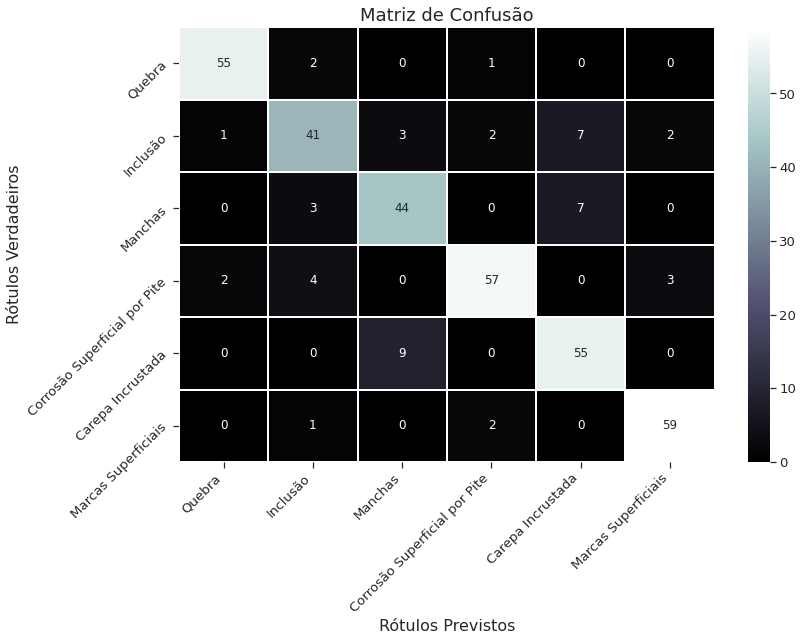

In [ ]:
import matplotlib.pyplot as plt

pred = clf.predict(X_teste)

c_matrix = confusion_matrix(pred, Y_teste)

ax = plt.subplot()
sns.set(style="ticks", color_codes=True, rc={"figure.figsize": (12, 8)}, font_scale=1.2)
sns.heatmap(c_matrix, annot=True, ax = ax, annot_kws={"size": 12}, linewidths=1, cmap = "bone");
ax.set_xlabel('Rótulos Previstos', size = '16'); ax.set_ylabel('Rótulos Verdadeiros', size = '16');
ax.set_title('Matriz de Confusão', size = '18')
ax.xaxis.set_ticklabels(choices, rotation = 45, ha = 'right'); ax.yaxis.set_ticklabels(choices, rotation = 45);

In [ ]:
features

,contrast,dissimilarity,homogeneity,ASM,energy,Label,defeitos
0,12769357,562393,2747.881680,312782,559.269166,0,Quebra
1,9580203,482361,3307.995564,289038,537.622544,0,Quebra
2,10928946,517098,3084.553772,337650,581.076587,0,Quebra
3,12465011,556457,2776.650206,372854,610.617720,0,Quebra
4,6088850,375354,4293.162968,371518,609.522764,0,Quebra
...,...,...,...,...,...,...,...
1795,878418,124428,11710.060699,2728618,1651.852899,5,Marcas Superficiais
1796,477005,93119,14425.559150,3308128,1818.825995,5,Marcas Superficiais
1797,1400820,151900,10458.336605,1487772,1219.742596,5,Marcas Superficiais
1798,368408,91122,13919.297455,3666654,1914.850908,5,Marcas Superficiais


In [ ]:
dot_data = export_graphviz(
            clf,
            out_file = None,
            feature_names = features.drop(columns = ['defeitos', 'Label']).columns,
            class_names = ['Quebra', 'Inclusão', 'Manchas', 'Corrosão Superficial por Pite', 'Carepa Incrustada', 'Marcas Superficiais'],
            filled = True, rounded = True,
            proportion = True,
            node_ids = True,
            rotate = False,
            label = 'all',
            special_characters = True
)
graph = graphviz.Source(dot_data)
print (graph)

In [ ]:
# Renderizando a árvore de forma interativa:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# feature matrix
X,y = features.drop(columns = ['defeitos', 'Label']),features['defeitos']

# feature labels
features_label = features.drop(columns = ['defeitos', 'Label']).columns

# class label
class_label = ['Quebra', 'Inclusão', 'Manchas', 'Corrosão Superficial por Pite', 'Carepa Incrustada', 'Marcas Superficiais']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,10))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

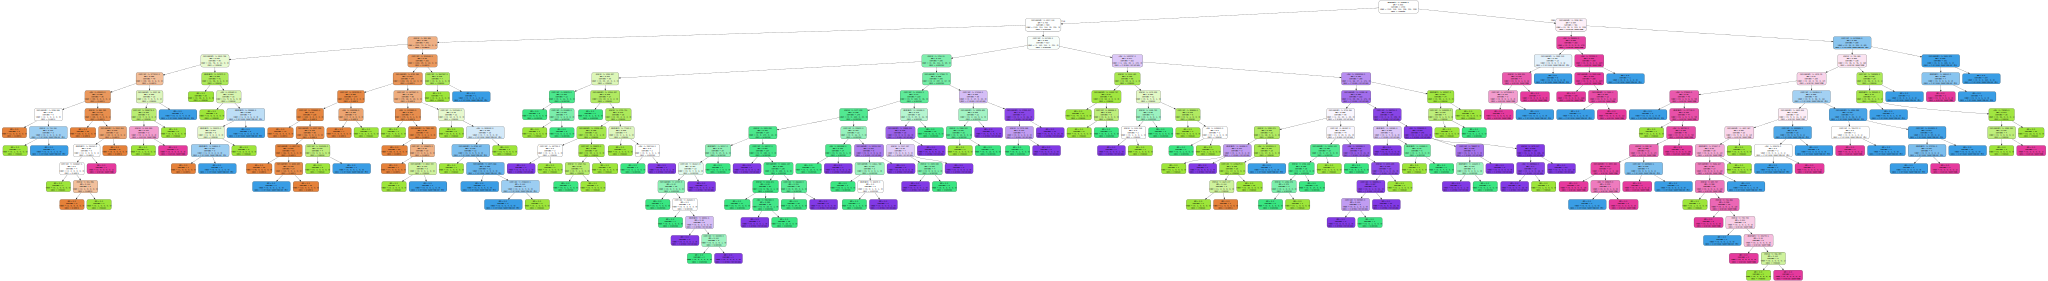

In [ ]:
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
          feature_names=X.columns,
          class_names=class_label,  
          filled=True, rounded=True,
          special_characters=False)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion' : ['entropy', 'gini'],
    'splitter' : ['best', 'random'],
    'max_depth' : [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 23, 25, 27, 29, 30, 31, 33, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100, 150, 200, 250, 300, 350, 400],
    'min_samples_leaf' : [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [5,6, 7, 8, 9, 10, 11,12,13,14,15, 50, 100, 200],
}
grid_DT = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 4, 
                        verbose = 1,
                        n_jobs = -1)
grid_DT.fit(X_treino, Y_treino)
grid_DT.best_estimator_
testt2=grid_DT.predict(X_teste)
scoree2=accuracy_score(Y_teste, testt2)
print("Decision Trees testing accuracy=",scoree2*100)
grid_DT.best_estimator_

Fitting 4 folds for each of 31920 candidates, totalling 127680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 6760 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 12360 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 19560 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 28360 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 38760 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 50760 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 64360 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 79560 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 96360 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 114760 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 127680 out of 127680 | elapsed: 10.2min finished


Decision Trees testing accuracy= 86.11111111111111


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
accuracy_score(Y_treino, grid_DT.predict(X_treino))

0.9520833333333333

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
importances = pd.DataFrame({'Característica':X.columns, 'Importância': np.round(clf.feature_importances_, 3)})

In [ ]:
pd.DataFrame(X2)

,0,1,2,3,4
0,0.045254,0.041166,0.006507,0.000289,0.005132
1,0.033951,0.035308,0.007833,0.000267,0.004934
2,0.038731,0.037850,0.007304,0.000312,0.005332
3,0.044175,0.040731,0.006575,0.000344,0.005604
4,0.021578,0.027475,0.010166,0.000343,0.005594
...,...,...,...,...,...
1795,0.003113,0.009108,0.027728,0.002519,0.015159
1796,0.001690,0.006816,0.034158,0.003054,0.016691
1797,0.004964,0.011119,0.024764,0.001374,0.011193
1798,0.001306,0.006670,0.032959,0.003385,0.017572


In [ ]:
importances.head()

,Característica,Importância
0,contrast,0.338
1,dissimilarity,0.032
2,homogeneity,0.477
3,ASM,0.075
4,energy,0.078


findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


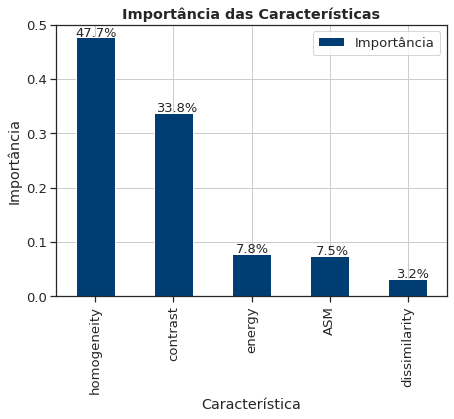

In [ ]:
importances2= importances.sort_values('Importância', ascending = False)
importances2

ax = importances2.plot(kind='bar', grid=True, figsize=(7,5), color = '#003d72')
ax.set_axisbelow(True)
plt.title("Importância das Características", fontweight='bold', fontname ='Segoe UI')

# plt.rc('font', size=20)                # controls default text sizes
plt.rc('axes', titlesize=16)             # fontsize of the axes title
plt.rc('axes', labelsize=14)             # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)            # fontsize of the tick (eixo) labels
plt.rc('ytick', labelsize=12)            # fontsize of the tick (eixo) labels
plt.rc('legend', fontsize=12)            # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#rot_y=[]
x = np.linspace(-0.25, 3.85, 5, endpoint=True)
for i in range(len(importances2)):
    rot = round(np.array(importances2)[i,1]*100 ,2)
    plt.text(x[i],np.array(importances2)[i,1]+0.002,str(rot)+"%", size = 13, fontname ='Arial')
    #rot_y.append(rot2)
    #print(rot_y)
    
#ax.set_yticklabels(str(rot2))
ax.set_xlabel('Característica', fontname ='Segoe UI')
ax.set_ylabel('Importância', fontname ='Segoe UI')
#ax.set_xticks(positions)

#ax.set_xticks(rot)
ax.set_xticklabels(importances2['Característica'], fontname ='Segoe UI')
#ax.set_yticklabels = (rot_y)
#print (ax.set_xticklabels)

plt.show()